This notebook is by Anastasia Ruzmaikina.

Here we analyse a dataset of nearly 5000 movies. The goal is to be able to predict if the movie is profitable given all the information available about the movie. The available data columns are the title, names of actors and actresses, movie genres, vote count, movie budget etc.

We use the Random Forest Algorithm to predict if a movie is profitable.

Random Forest models are much better in classifying data than KNN, Decision Trees or SVM algorithms. We can get accuracy up to 84%, an almost 10% improvement compared with SVM algorithm.




In [6]:
# Basic libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

We download the Movie Dataset from the Harvard Edx website.

In [2]:
df = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@movie_data.csv", index_col=0)

df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action, Crime, Thriller",NaN,9367,"united states–mexico barrier, legs, arms, pape...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,...,2040920,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"Carlos Gallardo, Jaime de Hoyos, Peter Marquar..."
4799,9000,"Comedy, Romance",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,...,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"Edward Burns, Kerry Bishé, Marsha Dietlein, Ca..."
4800,0,"Comedy, Drama, Romance, TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date, love at first sight, narration, investig...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Front Street Pictures, Muse Entertainment Ente...",...,0,120.0,English,Released,NaN,"Signed, Sealed, Delivered",7.0,6,231617,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof..."
4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,...,0,98.0,English,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,126186,"Daniel Henney, Eliza Coupe, Bill Paxton, Alan ..."


We can look at the shape of the data set:

In [3]:
df.shape

(4803, 22)

We replace infinite values with NaN values in the data frame. NaN values are handled later.

In [4]:
df = df.replace(to_replace = np.inf, value = np.nan)
df = df.replace(to_replace = -np.inf, value = np.nan)

Next we do a one hot encoding of the 'genres' column.

First we identify how many different genres are present in the 'genres' column.

We split the genres into different columns. Each column contains 1's or 0's, one if that particlar genre is present in that row.

In [7]:
genr = []
for i in range(len(df['genres'])):
    temp = df['genres'].iloc[i]
    if not (isinstance(temp, float)):
       temp = temp.split(',')
       genr += temp
       
genre = list(set(genr))
for i in range(len(genre)):
    genre[i] = genre[i].strip()
genre = list(set(genre))
for item in genre:
    df[item] = df['budget']
for item in genre:
    for i in range(len(df['genres'])):
        if not (isinstance(df['genres'].iloc[i], float)):
             if item in df['genres'].iloc[i]:
                   df[item].iloc[i] = 1
             else:
                   df[item].iloc[i] = 0

We create a new column indicating if a movie is profitable.

The 'profitable' column is the difference between 'revenue' and 'budget' column.

In [8]:
df['profitable'] = df['revenue']
for i in range(len(df['revenue'])):
    if df['revenue'].iloc[i] >= df['budget'].iloc[i]:
        df['profitable'].iloc[i] = 1
    else:
        df['profitable'].iloc[i] = 0

In [9]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Western,History,Adventure,Music,Thriller,Fantasy,Family,Animation,Comedy,profitable
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,0,0,1,0,0,1,0,0,0,1
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,0,0,1,0,0,1,0,0,0,1
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,0,0,1,0,0,0,0,0,0,1
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,0,0,0,0,1,0,0,0,0,1
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,0,0,1,0,0,0,0,0,0,1


Descriptive Statistics.

Before solving the problem, it's very important to have a good understanding of data.

First we get the descriptive statistics of the data.

Then we get the information about missing values in the data

In [10]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4775 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4391 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4452 non-null   object 
 10  production_countries  4629 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4716 non-null   object 
 15  status               

Column Statistics:

In [12]:
# Summary statistic of the data
df.describe() 

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,TV Movie,Documentary,...,Western,History,Adventure,Music,Thriller,Fantasy,Family,Animation,Comedy,profitable
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000,4.803000e+03,4.803000e+03,...,4.803000e+03,4.803000e+03,4.803000e+03,4.803000e+03,4.803000e+03,4.803000e+03,4.803000e+03,4.803000e+03,4.803000e+03,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281,7.703537e+02,7.703750e+02,...,7.703691e+02,7.703931e+02,7.705166e+02,7.703906e+02,7.706173e+02,7.704403e+02,7.704589e+02,7.704008e+02,7.707106e+02,0.723923
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033,3.441409e+04,3.441409e+04,...,3.441409e+04,3.441409e+04,3.441408e+04,3.441409e+04,3.441408e+04,3.441409e+04,3.441408e+04,3.441409e+04,3.441408e+04,0.447102
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000,2.000000e+06,2.000000e+06,...,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.000000


Find which rows contain NaN values.

In [14]:
# Get count of missing values in every column
print(df.isna().sum())

budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                    0
runtime                    2
spoken_languages          87
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                      43
TV Movie                   0
Documentary                0
Horror                     0
Action                     0
Drama                      0
Science Fiction            0
Crime                      0
Foreign                    0
Mystery                    0
War                        0
Romance                    0
Western                    0
History       

Conclusions:

The data contains some categorical columns, these columns need to be handled before building the model.

Some columns have missing values, these need to be handled before building the model. Since the columns with missing values are categorical, we are not going to have a problem with dropping the missing values.

The y variable (profitable) doesn't have any missing values, which is good.

Now we list the numeric and categorical columns.



In [15]:
# Create list of numeric and categorical columns and check if they have extra spaces in the column names
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'movie_id', 'TV Movie', 'Documentary', 'Horror', 'Action',
       'Drama', 'Science Fiction', 'Crime', 'Foreign', 'Mystery', 'War',
       'Romance', 'Western', 'History', 'Adventure', 'Music', 'Thriller',
       'Fantasy', 'Family', 'Animation', 'Comedy', 'profitable'],
      dtype='object')
Categorical columns: 
 Index(['genres', 'homepage', 'keywords', 'original_language', 'original_title',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'status', 'tagline', 'title',
       'cast'],
      dtype='object')


We already did one hot encoding on the 'genres' column, so we can drop the 'genres' column.

The only categorical column that can influence the 'profitable' column is the 'cast' column. But if we do a one hot encoding, we find that we need a hundred or more columns. Therefore it is impractical to use 'cast' data and we are going to drop the 'cast' column.

All other categorical columns have very little influence on the revenue from the movie, so we can drop them.

In addition we are going to drop the 'revenue' column, because it is linearly dependent on the related 'profitable' column we are going to predict.

We are going to drop the columns 'id' and 'movie_id', because they carry no information.



In [16]:
df = df.drop(columns=['genres', 'homepage', 'keywords', 'original_language', 'original_title',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'status', 'tagline', 'title',
       'cast', 'revenue', 'id', 'movie_id'])
df = df.dropna()
print(df.shape)

(4801, 26)


As a result of dropping categorical columns and the revenue column, only two rows remained with NaN values, when they were droppped the data frame has 4801 rows left.

In [17]:
df.head()

,budget,popularity,runtime,vote_average,vote_count,TV Movie,Documentary,Horror,Action,Drama,...,Western,History,Adventure,Music,Thriller,Fantasy,Family,Animation,Comedy,profitable
0,237000000,150.437577,162.0,7.2,11800,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,300000000,139.082615,169.0,6.9,4500,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,245000000,107.376788,148.0,6.3,4466,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,250000000,112.312950,165.0,7.6,9106,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
4,260000000,43.926995,132.0,6.1,2124,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


The histograms of the columns.

First we determine the distribution of the target variable 'profitable'.

The value counts for the profitable column are:
1    3477
0    1324
Name: profitable, dtype: int64


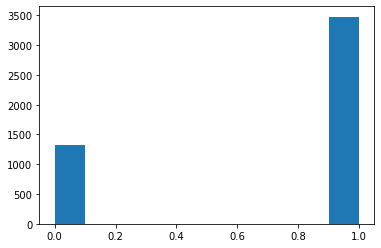

In [62]:
# 'profitable' is the target column y.
print('The value counts for the profitable column are:')
print(df.profitable.value_counts())
plt.hist(df['profitable'])
plt.show()

Next we plot the histogram of the profitable column as a function of the budget column.

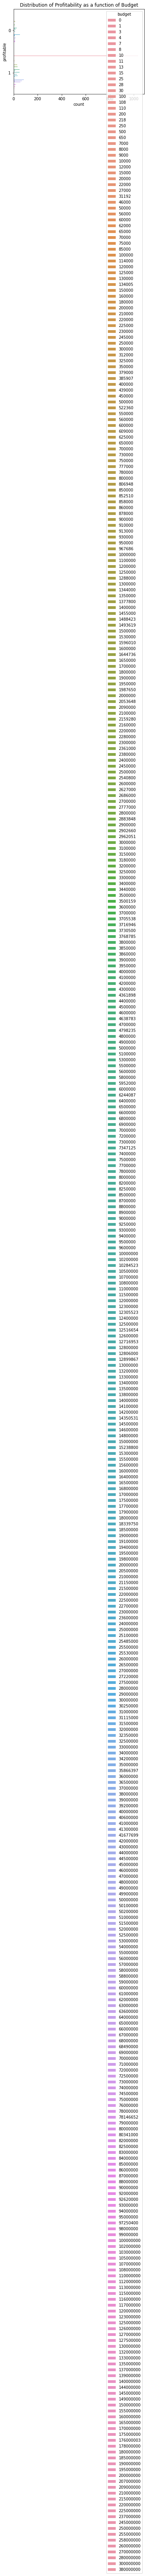

In [21]:
sns.countplot(y='profitable', data=df, hue='budget')
plt.title("Distribution of Profitability as a function of Budget")
plt.show()

Most movies are low budget and therefore easily profitable. Among the high budget movies, budget is not a good predictor of profitablity.

We plot the histogram of the 'profitable' column as a function of the 'runtime' column.

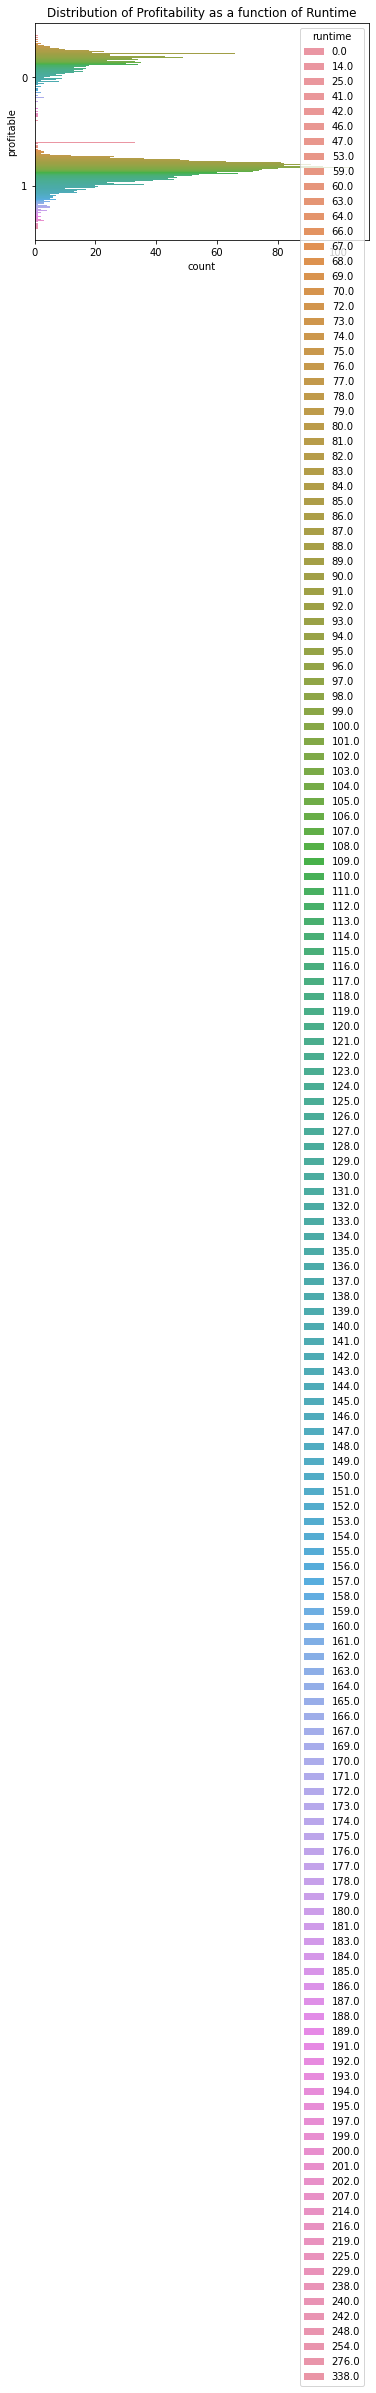

In [23]:
sns.countplot(y='profitable', data=df, hue='runtime')
plt.title("Distribution of Profitability as a function of Runtime")
plt.show()

Runtime is not a good predictor of profitability of a movie.

Next we plot the histogram of the 'profitable' column as a function of the 'vote_average' column.

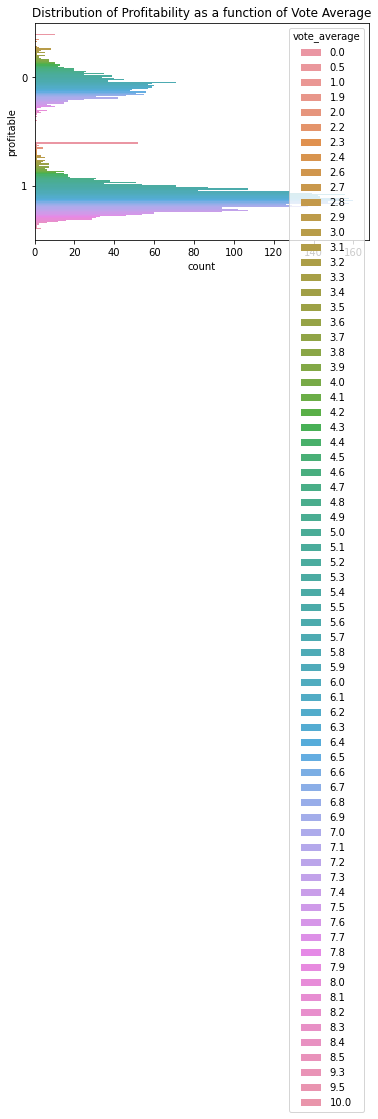

In [24]:
sns.countplot(y='profitable', data=df, hue='vote_average')
plt.title("Distribution of Profitability as a function of Vote Average")
plt.show()

Vote Average is not a good predictor of profitability.

Now we plot the histogram of the profitable column as a function of the vote_count column.

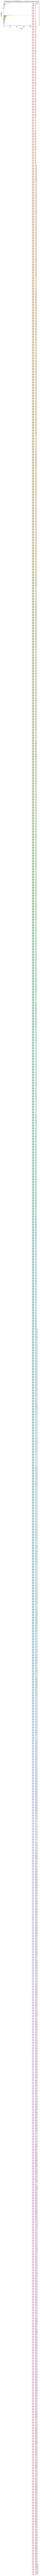

In [25]:
sns.countplot(y='profitable', data=df, hue='vote_count')
plt.title("Distribution of Profitability as a function of Vote Count")
plt.show()

High Vote Count corresponds to more profitable movies. Low Vote Count is not a good predictor of profitablity.

Data Preprocessing

We split the data into X columns (predictors) and the y column ('profitable').

We split X, y into a training set and a test set.

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['profitable'],axis=1)
y = df.profitable


X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,budget,popularity,runtime,vote_average,vote_count,TV Movie,Documentary,Horror,Action,Drama,...,Romance,Western,History,Adventure,Music,Thriller,Fantasy,Family,Animation,Comedy
2852,12000000,16.183746,94.0,5.6,364,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3263,8000000,45.395839,92.0,6.7,2210,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4579,400000,64.782984,91.0,7.8,1708,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1774,25000000,8.316530,104.0,5.2,127,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1957,14000000,14.480628,119.0,7.0,257,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,950000,7.310879,87.0,5.7,92,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
466,80000000,25.978555,96.0,5.8,631,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3093,0,8.045488,104.0,6.8,37,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3773,0,4.757625,96.0,6.1,67,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
print('Training Data Shape:',  X_train.shape)
print('Test Data Shape:',  X_test.shape)

Training Data Shape: (3840, 25)
Test Data Shape: (961, 25)


Model Building 

Random Forest Model 1

In [31]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

#storing the random forest classifier into clftree
clftree = RandomForestClassifier(random_state=100, n_estimators = 1000, max_depth=4, criterion='gini',
                                max_features = 'auto')

In [32]:
#Fitting the model into clftree variable
clftree.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=1000, random_state=100)

In [33]:
clftree.score(X_test,y_test)

0.7898022892819979

Predict values using trained model 1

In [34]:
# Predicting the test and trained values
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [36]:
y_train_pred[0:100]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [37]:
y_test_pred[0:100]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Model 1 Performance

In [39]:
# Importing all the required metrics for calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
confusion_matrix(y_train, y_train_pred)

array([[ 321,  736],
       [  73, 2710]])

From the confusion matrix we see that the Random Forest Model is very good at predicting if a movie is profitable (1), but is not good at predicting if a movie is not profitable (0).

In [41]:
confusion_matrix(y_test, y_test_pred)

array([[ 77, 190],
       [ 12, 682]])

In [42]:
# The Accuracy_score
accuracy_score(y_test, y_test_pred)

0.7898022892819979

Decision Tree Model 2

In [43]:
#storing the random forest classifier into clftree2
clftree2 = RandomForestClassifier(random_state=0, n_estimators = 5000, max_depth=6, criterion='gini',
                                max_features = 'auto')
clftree2.fit(X_train, y_train)
clftree2.score(X_test,y_test)

0.8345473465140478

As we see, Model 2 with more trees and higher max depth of each tree is significantly better than Model 1.

Random Forest Model 3


In [44]:
#storing the random forest classifier into clftree3
clftree3 = RandomForestClassifier(random_state=10, n_estimators = 5000, max_depth=6, criterion='entropy',
                                max_features = 'auto')
clftree3.fit(X_train, y_train)
clftree3.score(X_test,y_test)

0.8345473465140478

As we see, Model 2 and Model 3 preform similarly. This means that the splitting criterion is not significant in Random Forest models, unlike the Decision Tree models.

Random Forest Model 4

In [45]:
#storing the random forest classifier into clftree4
clftree4 = RandomForestClassifier(random_state=10, n_estimators = 8000, max_depth=8, criterion='entropy',
                                max_features = 'auto')
clftree4.fit(X_train, y_train)
clftree4.score(X_test,y_test)

0.8428720083246618

Random Forest Model 4 performs better than other models due to a higher number of trees and higher max depth.

Hyperparameter Tuning Using GridSearchCV

One traditional and popular way to perform hyperparameter tuning is by using an Exhaustive Grid Search from Scikit learn. This method tries every possible combination of each set of hyper-parameters. Using this method, we can find the best set of values in the parameter search space. This usually uses more computational power and takes a long time to run since this method needs to try every combination in the grid size.

In [46]:
# Importing GridsearchCV
from sklearn.model_selection import GridSearchCV

In [48]:
# Assigning all the parameters of random forest classifier for  parameters variable

parameters = {
    'n_estimators' : [1000, 5000, 8000],
    'max_depth' : [5, 6],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2']
}

In [49]:
# Assigning parameters for GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),parameters, scoring='accuracy', verbose=2, cv=3, n_jobs = -1)

In [50]:
# Fitting the model into gridsearchCV
grid_result= grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1000; total time=   4.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=5000; total time=  21.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=1000; total time=   4.4s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=1000; total time=   4.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=1000; total time=   4.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=5000; total time=  21.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=8000; total time=  35.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=5000; total time=  24.4s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=8000; total time=  39.7s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=8000; total ti

best_index_: (int) The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.



In [51]:
print('Best index: ', grid_result.best_index_)

Best index:  7


best_params (dict): Parameter setting that gave the best results on the hold out data.

In [52]:
print('Best Params: ', grid_result.best_params_)

Best Params:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 5000}


best_score (float) : Mean cross-validated score of the best_estimator



In [53]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.8221354166666668


We try a grid search with a higher max depth.

In [54]:
# Assigning all the parameters of random forest classifier for  parameters variable

parameters = {
    'n_estimators' : [5000, 8000],
    'max_depth' : [8, 10],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2']
}

In [55]:
# Assigning parameters for GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),parameters, scoring='accuracy', verbose=2, cv=3, n_jobs = -1)

In [56]:
# Fitting the model into gridsearchCV
grid_result= grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=8000; total time=  42.9s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=5000; total time=  28.9s
[CV] END criterion=gini, max_depth=8, max_features=log2, n_estimators=8000; total time=  48.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=5000; total time=  33.5s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=5000; total time=  31.3s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=8000; total time=  44.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=5000; total time=  27.5s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=8000; total time=  44.9s
[CV] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=8000; total time=  42.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimator

best_index_: (int) The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.



In [57]:
print('Best index: ', grid_result.best_index_)


Best index:  4


best_params (dict): Parameter setting that gave the best results on the hold out data.



In [58]:
print('Best Params: ', grid_result.best_params_)


Best Params:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 5000}


best_score (float) : Mean cross-validated score of the best_estimator



In [59]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.8260416666666668


Conclusion: Random Forest models are much better in classifying data than KNN, Decision Trees or SVM algorithms. We can get accuracy up to 84.3%, an almost 10% improvement compared with SVM algorithm.